# This notebook analyses and visualises the performance of the Vidgen et al. (2021) and three RHS models on the Unseen Words Test set by comparing the ground truth to predicted labels at dataset, gold label and target word level for the three models. It uses the same code structure and functions as Notebook 12.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('Notebook_16_unseen_words_analysis.csv')

In [ ]:
df['gold_label'].value_counts(normalize = True) * 100

DEG    57.312134
NDG    25.251237
HOM    14.369282
APR     2.467377
CMP     0.599970
Name: gold_label, dtype: float64

# Comparison of RHS Model (No Cross-Validation) with Vidgen Model

In [ ]:
from sklearn.metrics import accuracy_score

# Grouping the data by "gold_label" and calculating accuracy for both models
accuracy_results = []

for label, group in df.groupby('gold_label'):
    true_labels = group['hate_label']
    rhs_accuracy = accuracy_score(true_labels, group['RHS Model (No Cross_Validation)']) * 100  # Convert to percentage
    vidgen_accuracy = accuracy_score(true_labels, group['Vidgen Model Prediction']) * 100  # Convert to percentage
    accuracy_results.append((label, rhs_accuracy, vidgen_accuracy))

# Converting the results into a DataFrame for easier visualization
accuracy_df = pd.DataFrame(accuracy_results, columns=['Gold Label', 'RHS Model (No Cross_Validation)', 'Vidgen Model'])

# Sorting the DataFrame by RHS Model Accuracy in descending order
accuracy_df = accuracy_df.sort_values(by='RHS Model (No Cross_Validation)', ascending=False)

import plotly.express as px

# Melting the DataFrame for Plotly
melted_accuracy_df = accuracy_df.melt(id_vars='Gold Label', value_vars=['RHS Model (No Cross_Validation)', 'Vidgen Model'])

# Custom color scale for the two groups
color_scale = ['rgb(106,166,30)','rgb(230,171,2)']

# Creating a grouped bar chart
fig = px.bar(melted_accuracy_df, x='Gold Label', y='value',
             color='variable', barmode='group',
             title='Comparison of Model Accuracies Grouped by Gold Label (Unseen Word Dataset)',
             labels={'value': 'Accuracy (%)', 'variable': 'Model'},  # Updated y-axis label
             color_discrete_sequence=color_scale)

# Update layout to set font size, center the title, and set the background color to white
fig.update_layout(
    font=dict(size=18),
    title=dict(x=0.5),
    plot_bgcolor='white',  # Background color set to white
    legend=dict(orientation='h', yanchor='bottom', y=-0.4, xanchor='center', x=0.5)
)

# Set y-axis limits to go up to 100
fig.update_yaxes(range=[0, 100])

# Showing the figure
fig.show()


In [ ]:
accuracy_df

,Gold Label,RHS Model (No Cross_Validation),Vidgen Model
1,CMP,93.750000,88.750000
4,NDG,90.495990,66.409266
3,HOM,80.375783,73.747390
2,DEG,69.392829,87.254645
0,APR,62.310030,46.504559


In [ ]:
from sklearn.metrics import accuracy_score

# Grouping the data by "gold_label" and calculating accuracy for both models
accuracy_results = []

for label, group in df.groupby('dataset'):
    true_labels = group['hate_label']
    rhs_accuracy = accuracy_score(true_labels, group['RHS Model (No Cross_Validation)']) * 100  # Convert to percentage
    vidgen_accuracy = accuracy_score(true_labels, group['Vidgen Model Prediction']) * 100  # Convert to percentage
    accuracy_results.append((label, rhs_accuracy, vidgen_accuracy))

# Converting the results into a DataFrame for easier visualization
accuracy_df = pd.DataFrame(accuracy_results, columns=['Dataset', 'RHS Model (No Cross_Validation)', 'Vidgen Model'])

# Sorting the DataFrame by RHS Model Accuracy in descending order
accuracy_df = accuracy_df.sort_values(by='RHS Model (No Cross_Validation)', ascending=False)

import plotly.express as px

# Melting the DataFrame for Plotly
melted_accuracy_df = accuracy_df.melt(id_vars='Dataset', value_vars=['RHS Model (No Cross_Validation)', 'Vidgen Model'])

# Custom color scale for the two groups
color_scale = ['#76B0B2','#D5DF7F']

# Creating a grouped bar chart
fig = px.bar(melted_accuracy_df, x='Dataset', y='value',
             color='variable', barmode='group',
             title='Comparison of Model Accuracies Grouped by Dataset',
             labels={'value': 'Accuracy (%)', 'variable': 'Model'},  # Updated y-axis label
             color_discrete_sequence=color_scale)

# Update layout to set font size, center the title, and set the background color to white
fig.update_layout(
    font=dict(size=18),
    title=dict(x=0.5),
    plot_bgcolor='white'  # Background color set to white
)

# Showing the figure
fig.show()

In [ ]:
accuracy_df

,Dataset,RHS Model (No Cross_Validation),Vidgen Model
0,kurrek_unseen,76.271186,79.053547


In [ ]:
# Initialize a list to store the results
accuracy_results = []

# Iterate through the specific columns (from index 5 to 18)
for column in df.columns[4:17]:
    # Filter the dataframe based on the current binary column being 1
    sub_df = df[df[column] == 1]

    # Calculate accuracy for RHS Model Prediction
    rhs_accuracy = accuracy_score(sub_df['hate_label'], sub_df['RHS Model (No Cross_Validation)'])

    # Calculate accuracy for Vidgen Model Prediction
    vidgen_accuracy = accuracy_score(sub_df['hate_label'], sub_df['Vidgen Model Prediction'])

    # Append the results
    accuracy_results.append((column, rhs_accuracy, vidgen_accuracy))

# Converting the results into a DataFrame for easier visualization
accuracy_comparison_df = pd.DataFrame(accuracy_results, columns=['Target Word', 'RHS Model (No Cross_Validation)', 'Vidgen Model'])

# Sorting the DataFrame by RHS Model Accuracy in descending order
accuracy_comparison_df = accuracy_comparison_df.sort_values(by='RHS Model (No Cross_Validation)', ascending=False)

# Convert accuracy to percentages
accuracy_comparison_df['RHS Model (No Cross_Validation)'] *= 100
accuracy_comparison_df['Vidgen Model'] *= 100

# Display the results
accuracy_comparison_df


,Target Word,RHS Model (No Cross_Validation),Vidgen Model
8,queer,84.883721,77.906977
2,fag,84.831461,71.348315
7,queen,83.815029,75.722543
6,puss,81.538462,92.307692
11,slut,81.250000,77.083333
1,drag,80.188679,75.000000
0,bitch,78.723404,77.304965
5,other,76.372133,79.252336
4,homo,72.289157,77.710843
3,gay,71.563342,76.954178


In [ ]:
# Melting the DataFrame for Plotly
melted_accuracy_df = accuracy_comparison_df.melt(id_vars='Target Word', value_vars=['RHS Model (No Cross_Validation)', 'Vidgen Model'])

# Custom color scale for the two groups
color_scale = ['#76B0B2','#D5DF7F']

# Creating a grouped bar chart
fig = px.bar(melted_accuracy_df, x='Target Word', y='value',
             color='variable', barmode='group',
             title='Comparison of Model Accuracies at Target Word Level',
             labels={'value': 'Accuracy (%)', 'variable': 'Model'},  # Updated y-axis label
             color_discrete_sequence=color_scale)

# Update layout to set font size, center the title, and set the background color to white
fig.update_layout(
    font=dict(size=18),
    title=dict(x=0.5),
    plot_bgcolor='white',  # Background color set to white
    yaxis_title="Accuracy (%)"  # Updated y-axis title
)

# Showing the figure
fig.show()


# Comparison of all RHS Models with Vidgen Model

In [ ]:
from sklearn.metrics import accuracy_score

# Grouping the data by "gold_label" and calculating accuracy for both models
accuracy_results = []

for label, group in df.groupby('gold_label'):
    true_labels = group['hate_label']
    rhs_nocv_accuracy = accuracy_score(true_labels, group['RHS Model (No Cross_Validation)']) * 100  # Convert to percentage
    rhs_bestfold_accuracy = accuracy_score(true_labels, group['RHS Model (Best Fold)']) * 100  # Convert to percentage
    rhs_avweights_accuracy = accuracy_score(true_labels, group['RHS Model (Averaged Weights)']) * 100  # Convert to percentage
    vidgen_accuracy = accuracy_score(true_labels, group['Vidgen Model Prediction']) * 100  # Convert to percentage
    accuracy_results.append((label, rhs_nocv_accuracy, rhs_bestfold_accuracy, rhs_avweights_accuracy, vidgen_accuracy))

# Converting the results into a DataFrame for easier visualization
accuracy_df = pd.DataFrame(accuracy_results, columns=['Gold Label', 'RHS Model (No Cross_Validation)', 'RHS Model (Best Fold)','RHS Model (Averaged Weights)', 'Vidgen Model'])

# Sorting the DataFrame by RHS Model Accuracy in descending order
accuracy_df = accuracy_df.sort_values(by='RHS Model (No Cross_Validation)', ascending=False)

accuracy_df

,Gold Label,RHS Model (No Cross_Validation),RHS Model (Best Fold),RHS Model (Averaged Weights),Vidgen Model
1,CMP,93.750000,98.750000,98.750000,88.750000
4,NDG,90.495990,92.367092,94.089694,66.409266
3,HOM,80.375783,87.943633,92.327766,73.747390
2,DEG,69.392829,62.771526,58.701910,87.254645
0,APR,62.310030,74.164134,65.653495,46.504559


In [ ]:
import plotly.express as px

# Melting the DataFrame for Plotly
melted_accuracy_df = accuracy_df.melt(id_vars='Gold Label', value_vars=['RHS Model (No Cross_Validation)','RHS Model (Best Fold)','RHS Model (Averaged Weights)', 'Vidgen Model'])

# Custom color scale for the two groups
color_scale = ['rgb(106,166,30)','rgb(230,171,2)', 'rgb(166,118,29)', 'rgb(102,102,102)']

# Creating a grouped bar chart
fig = px.bar(melted_accuracy_df, x='Gold Label', y='value',
             color='variable', barmode='group',
             title='Comparison of All Model Accuracies Grouped by Gold Label (Unseen Word Dataset)',
             labels={'value': 'Accuracy (%)', 'variable': 'Model'},  # Updated y-axis label
             color_discrete_sequence=color_scale)

# Update layout to set font size, center the title, and set the background color to white
fig.update_layout(
    font=dict(size=18),
    title=dict(x=0.5),
    plot_bgcolor='white',  # Background color set to white
)

# Showing the figure
fig.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Grouping the data by "dataset" and calculating accuracy for both models
accuracy_results = []

for label, group in df.groupby('dataset'):
    true_labels = group['hate_label']
    rhs_nocv_accuracy = accuracy_score(true_labels, group['RHS Model (No Cross_Validation)']) * 100  # Convert to percentage
    rhs_bestfold_accuracy = accuracy_score(true_labels, group['RHS Model (Best Fold)']) * 100  # Convert to percentage
    rhs_avweights_accuracy = accuracy_score(true_labels, group['RHS Model (Averaged Weights)']) * 100  # Convert to percentage
    vidgen_accuracy = accuracy_score(true_labels, group['Vidgen Model Prediction']) * 100  # Convert to percentage
    accuracy_results.append((label, rhs_nocv_accuracy, rhs_bestfold_accuracy, rhs_avweights_accuracy, vidgen_accuracy))

# Converting the results into a DataFrame for easier visualization
accuracy_df = pd.DataFrame(accuracy_results, columns=['Dataset', 'RHS Model (No Cross_Validation)', 'RHS Model (Best Fold)','RHS Model (Averaged Weights)', 'Vidgen Model'])

# Sorting the DataFrame by RHS Model Accuracy in descending order
accuracy_df = accuracy_df.sort_values(by='RHS Model (No Cross_Validation)', ascending=False)

accuracy_df

,Dataset,RHS Model (No Cross_Validation),RHS Model (Best Fold),RHS Model (Averaged Weights),Vidgen Model
0,kurrek_unseen,76.271186,74.358782,72.881356,79.053547


In [ ]:
import plotly.express as px

# Melting the DataFrame for Plotly
melted_accuracy_df = accuracy_df.melt(id_vars='Dataset', value_vars=['RHS Model (No Cross_Validation)','RHS Model (Best Fold)','RHS Model (Averaged Weights)', 'Vidgen Model'])

# Custom color scale for the two groups
color_scale = ['#76B0B2','#D5DF7F', 'rgb(255,217,47)', 'rgb(299,146,148)']

# Creating a grouped bar chart
fig = px.bar(melted_accuracy_df, x='Dataset', y='value',
             color='variable', barmode='group',
             title='Comparison of All Model Accuracies Grouped by Dataset',
             labels={'value': 'Accuracy (%)', 'variable': 'Model'},  # Updated y-axis label
             color_discrete_sequence=color_scale)

# Update layout to set font size, center the title, and set the background color to white
fig.update_layout(
    font=dict(size=18),
    title=dict(x=0.5),
    plot_bgcolor='white'  # Background color set to white
)

# Showing the figure
fig.show()

In [ ]:
# Initialize a list to store the results
accuracy_results = []

# Iterate through the specific columns (from index 5 to 18)
for column in df.columns[4:17]:
    # Filter the dataframe based on the current binary column being 1
    sub_df = df[df[column] == 1]

    # Calculate accuracy for RHS Model (No Cross_Validation)
    rhs_no_cv_accuracy = accuracy_score(sub_df['hate_label'], sub_df['RHS Model (No Cross_Validation)'])

    # Calculate accuracy for RHS Model (Best Fold)
    rhs_best_fold_accuracy = accuracy_score(sub_df['hate_label'], sub_df['RHS Model (Best Fold)'])

    # Calculate accuracy for RHS Model (Averaged Weights)
    rhs_avg_weights_accuracy = accuracy_score(sub_df['hate_label'], sub_df['RHS Model (Averaged Weights)'])

    # Calculate accuracy for Vidgen Model Prediction
    vidgen_accuracy = accuracy_score(sub_df['hate_label'], sub_df['Vidgen Model Prediction'])

    # Append the results
    accuracy_results.append((column, rhs_no_cv_accuracy, rhs_best_fold_accuracy, rhs_avg_weights_accuracy, vidgen_accuracy))

# Converting the results into a DataFrame for easier visualization
accuracy_comparison_df = pd.DataFrame(accuracy_results, columns=['Target Word', 'RHS Model (No Cross_Validation)', 'RHS Model (Best Fold)', 'RHS Model (Averaged Weights)', 'Vidgen Model'])

# Sorting the DataFrame by RHS Model Accuracy in descending order
accuracy_comparison_df = accuracy_comparison_df.sort_values(by='RHS Model (No Cross_Validation)', ascending=False)

# Convert accuracy to percentages
accuracy_comparison_df[['RHS Model (No Cross_Validation)', 'RHS Model (Best Fold)', 'RHS Model (Averaged Weights)', 'Vidgen Model']] *= 100

# Display the results
accuracy_comparison_df



,Target Word,RHS Model (No Cross_Validation),RHS Model (Best Fold),RHS Model (Averaged Weights),Vidgen Model
8,queer,84.883721,83.720930,82.558140,77.906977
2,fag,84.831461,84.831461,83.707865,71.348315
7,queen,83.815029,83.236994,82.080925,75.722543
6,puss,81.538462,81.538462,81.538462,92.307692
11,slut,81.250000,70.833333,70.833333,77.083333
1,drag,80.188679,83.018868,78.301887,75.000000
0,bitch,78.723404,78.723404,80.851064,77.304965
5,other,76.372133,74.664401,73.169074,79.252336
4,homo,72.289157,69.879518,67.469880,77.710843
3,gay,71.563342,64.824798,63.881402,76.954178


In [ ]:

# Melting the DataFrame for Plotly
melted_accuracy_df = accuracy_comparison_df.melt(id_vars='Target Word', value_vars=['RHS Model (No Cross_Validation)', 'RHS Model (Best Fold)', 'RHS Model (Averaged Weights)', 'Vidgen Model'])

# Custom color scale for the four groups
color_scale = ['#76B0B2','#D5DF7F', 'rgb(255,217,47)', 'rgb(299,146,148)']

# Creating a grouped bar chart
fig = px.bar(melted_accuracy_df, x='Target Word', y='value',
             color='variable', barmode='group',
             title='Comparison of Model Accuracies at Target Word Level',
             labels={'value': 'Accuracy (%)', 'variable': 'Model'},  # Updated y-axis label
             color_discrete_sequence=color_scale)

# Update layout to set font size, center the title, and set the background color to white
fig.update_layout(
    font=dict(size=18),
    title=dict(x=0.5),
    plot_bgcolor='white',  # Background color set to white
    yaxis_title="Accuracy (%)"  # Updated y-axis title
)

# Showing the figure
fig.show()

In [ ]:
selected_columns = ['bitch', 'drag', 'fag', 'gay', 'homo', 'other', 'puss', 'queen',
       'queer', 'sissy', 'slay', 'slut', 'whore']

# Calculate the correlation matrix for selected columns
correlation_matrix = df[selected_columns].corr(method='pearson')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

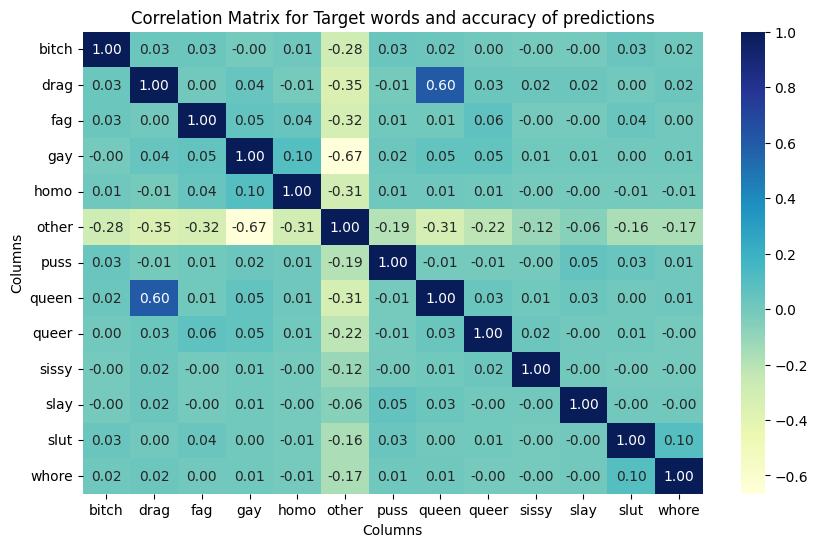

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title('Correlation Matrix for Target words and accuracy of predictions')
plt.xlabel('Columns')
plt.ylabel('Columns')
plt.show()